In [1]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime,date
import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
import itertools
import yfinance as yf
import datetime
from pso import PSOPortfolioOptimizer

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


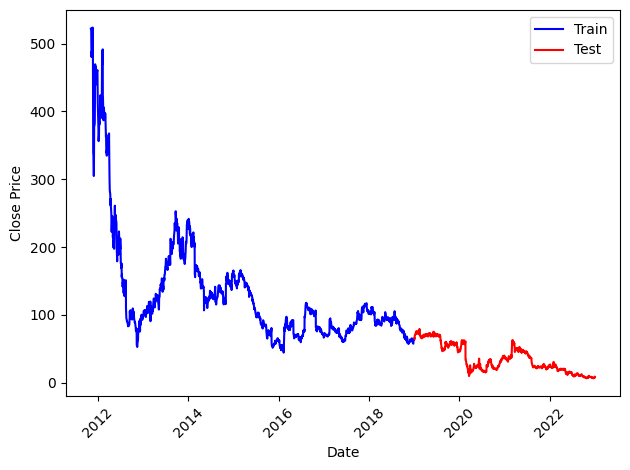

In [2]:
#GROUPON 
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
period ="train"
data = Data('GRPN',start_date,end_date,period,2019)
data.data_preprocess()

In [3]:
pso = PSOPortfolioOptimizer(
                data=data.train_data,
                strategies=data.strategies,
                num_particles=10,
                iterations=3
            )
profit, mdd, fitness = pso.run()
print(f"Profit: {profit}, MDD: {mdd}, Fitness: {fitness}")
test_profit_val, test_mdd_val, test_fitness_val = pso.evaluate_on_data(data.test_data)
print(f"Test Profit: {test_profit_val}, Test MDD: {test_mdd_val}, Test Fitness: {test_fitness_val}")

Profit: 1.0036460788625612, MDD: 1.3430358639999735, Fitness: 0.7472965583163168
Test Profit: -0.5459866767664703, Test MDD: 0.914845300829296, Test Fitness: -0.5968076529130554


In [4]:
import time
import numpy as np

# Initialize result dictionaries
fitness_values = {alg: [] for alg in ["ring", "multikuti", "master_slave", "gga", "pso"]}
test_fitness_values = {alg: [] for alg in fitness_values}
speed_values = {alg: [] for alg in fitness_values}
profit = {alg: [] for alg in fitness_values}
test_profit = {alg: [] for alg in fitness_values}
mdd = {alg: [] for alg in fitness_values}
test_mdd = {alg: [] for alg in fitness_values}

# List of algorithms to compare
evolve_strategies = ["ring", "multikuti", "master_slave", "gga", "pso"]

# Number of repetitions per algorithm for statistical robustness
num_runs = 2

for strategy in evolve_strategies:
    print(f"Running strategy: {strategy}")
    for run in range(num_runs):
        start_time = time.time()
        
        if strategy != "pso":
            # Initialize and run GA
            ga = IslandGGA(
                data=data.train_data,
                K=4,
                num_islands=10,
                m_iter=5,
                num_iter=5,
                pSize=20,
                strategies=data.strategies,
                evolve_strategy=strategy
            )
            ga.evolve()

            # Record training results
            fitness_values[strategy].append(ga.globalBest.fitness_value)
            profit[strategy].append(ga.globalBest.profit)
            mdd[strategy].append(ga.globalBest.mdd)

            # Evaluate on test data
            ga.globalBest.calculate_chromosome_fitness(data.test_data, allocated_capital=1)
            test_fitness_values[strategy].append(ga.globalBest.fitness_value)
            test_profit[strategy].append(ga.globalBest.profit)
            test_mdd[strategy].append(ga.globalBest.mdd)

        else:
            # Initialize and run PSO
            pso = PSOPortfolioOptimizer(
                data=data.train_data,
                strategies=data.strategies,
                num_particles=10,
                iterations=3
            )
            train_profit, train_mdd, train_fitness = pso.run()
            ## time
            end_time = time.time()
            speed_values[strategy].append(end_time - start_time)

            # Evaluate on training data
            
            profit["pso"].append(train_profit)
            mdd["pso"].append(train_mdd)
            fitness_values["pso"].append(train_fitness)

            # Evaluate on test data
            test_profit_val, test_mdd_val, test_fitness_val = pso.evaluate_on_data(data.test_data)
            test_profit["pso"].append(test_profit_val)
            test_mdd["pso"].append(test_mdd_val)
            test_fitness_values["pso"].append(test_fitness_val)

        

print("All strategies completed.")


Running strategy: ring
Running ring
Generation 1: Best fitness = 0.8963484459442673  Average Fitness = 0.1768062964474721
Generation 2: Best fitness = 1.172104085951167  Average Fitness = 0.19110282047329796
Generation 3: Best fitness = 1.172104085951167  Average Fitness = 0.2243266752736078
Generation 4: Best fitness = 1.172104085951167  Average Fitness = 0.3458443578808211
Generation 5: Best fitness = 1.3352544219439813  Average Fitness = 0.3723046988932456
Running ring
Generation 1: Best fitness = 0.9661733829395203  Average Fitness = -0.20708320262060714
Generation 2: Best fitness = 0.9661733829395203  Average Fitness = -0.0993114763439362
Generation 3: Best fitness = 1.2913645495025121  Average Fitness = 0.029558525295797923
Generation 4: Best fitness = 1.2913645495025121  Average Fitness = 0.04114480406466855
Generation 5: Best fitness = 1.2913645495025121  Average Fitness = 0.2014487434562305
Running strategy: multikuti
Running multikuti
Generation 1: Best fitness = 1.0448394316